In [3]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

##Approximately Normal Probability Histograms

We have noticed earlier that the empirical distributions of some statistics turn out roughly bell shaped. Now that we know how to work with the bell shaped curve, we can better understand which distributions turn out to be bell shaped, and exactly which bells they resemble.

We will start by revisiting the data on the highest grossing movies of the past couple of decades. There are over 600 movies on our list. The histogram below shows their box office gross amounts in millions of dollars.

In [4]:
imdb = Table.read_table('imdb.csv')
box_office = imdb.select('in_millions').relabel('in_millions', 'mill$')

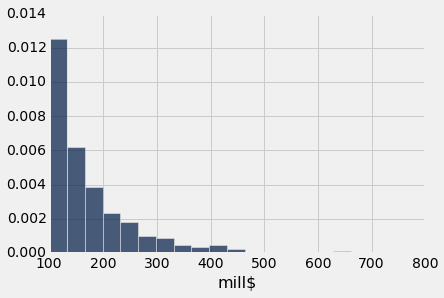

In [5]:
box_office.hist(bins=20, normed=True)

By the law of averages, the empirical histogram of a large random sample from this population should resemble the histogram of the population. This is demonstrated in the histogram of a random sample of size 400 taken with replacement:

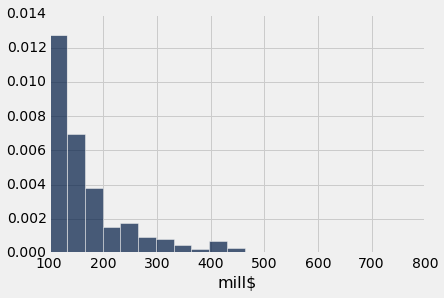

In [6]:
samp400 = box_office.sample(400, with_replacement=True)
samp400.hist(bins=20,normed=True)

So it is reasonable to expect that if we use the mean of the sample as an estimate of the mean of the population, we will not be very far off. The mean of the population is about 174.29 million dollars:

In [7]:
np.mean(box_office['mill$'])

174.29050139234451

And the mean of the sample is about 177 million dollars:

In [8]:
np.mean(samp400['mill$'])

171.24183459

Could another sample have had a mean further away from the population mean? To answer this, we will use one of the main methods of this course: simulate! The function ``samp_means`` takes a sample size ``n`` as its argument, and performs 4000 replications of the following simulation: 

- Draw ``n`` times at random with replacement from the list of box office receipts, and compute the mean of the sample.

Once it has computed all 4000 sample means, it draws their histogram and provides some summary statistics.

In [9]:
"""Empirical distribution of random sample means"""

def samp_means(n):
    sample_size = n
    repetitions = 4000

    ave = []

    for i in range(repetitions):
        ave.append(np.mean(box_office.sample(sample_size, with_replacement=True)['mill$']))

    Ave = Table([ave], ['averages'])
    Ave.hist(bins=np.arange(140, 211, 1), normed=True)
    plots.ylim(0, 0.1)
    plots.xlabel('averages: sample size '+str(n))
    print("Sample size: ", n)
    print("Number of repetitions:", Ave.num_rows)
    print("Population average:", np.mean(box_office['mill$']))
    print("Population SD:", np.std(box_office['mill$']))
    print("Average of sample averages: ", np.mean(ave))
    print("SD of sample averages", np.std(ave))

Let us call ``samp_means`` with sample sizes of 25, 100, and 400.

Sample size:  25
Number of repetitions: 4000
Population average: 174.290501392
Population SD: 86.1522642417
Average of sample averages:  174.216899608
SD of sample averages 17.3178435552


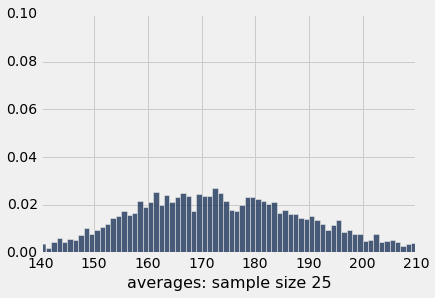

In [10]:
samp_means(25)

Sample size:  100
Number of repetitions: 4000
Population average: 174.290501392
Population SD: 86.1522642417
Average of sample averages:  174.273717283
SD of sample averages 8.83871141281


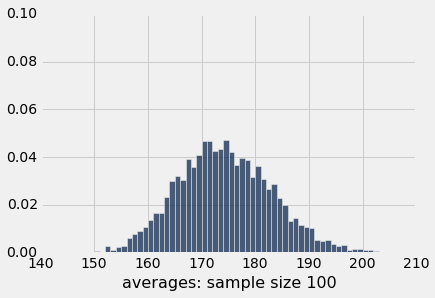

In [11]:
samp_means(100)

Sample size:  400
Number of repetitions: 4000
Population average: 174.290501392
Population SD: 86.1522642417
Average of sample averages:  174.351274505
SD of sample averages 4.31007313615


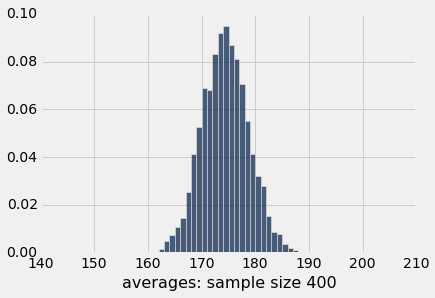

In [12]:
samp_means(400)

All three histograms balance very close to 174.29, the population mean. The bigger the sample size, the closer the balance point is to the population mean. This leads to a restatement of the Law of Averages, this time in terms of sample averages instead of sample proportions.

###Law of Averages, restated
As the sample size gets larger, the average of a random sample tends to get closer to the average of the population.

But we have observed something more: the shapes of all the histograms look like bells. Putting this together with our observation about the average gets us close to one of the greatest theorems in all of probability and statistics:

###The Central Limit Theorem (first attempt)
When the sample size is large, the probability distribution of the average of a random sample (drawn with replacement) is approximately bell shaped, with
- mean equal to the mean of the population, and 
- SD equal to ... 

Well, we don't quite know the SD yet, but we can see that it is getting smaller as the sample size increases. In other words, as the sample size increases, the sample mean is more likely to be close to the population mean. But how close?

###The variability in the sample average

Let us take a look at the SDs in the graphs above. In all three of them, the SD of the population is about 86 million dollars; all the samples were taken from the same population. Now look at the SD of empirical histogram of the sample mean, when the sample size is 100. That SD is about one-tenth of the population SD. When the sample size is 400, the SD of the sample means is about one-twentieth of the population SD. When the sample size is 25, the SD of the sample means is about one-fifth of the population SD.

It seems like a good idea to compare the SD of the emirical distribution of the sample means to the number "population SD divided by the square root of the sample size."

Here are the numerical values. For each sample size in the first column, 4000 sample means were simulated; the second column contains the SD of those 4000 means. The third column contains the result of the calculation "population SD divided by the square root of the sample size."

In [13]:
repetitions = 4000
samp_sizes = np.arange(25, 626, 25)

se = []
for n in samp_sizes:
    ave = []
    for i in range(repetitions):
        ave.append(np.mean(box_office.sample(n, with_replacement=True)['mill$']))
    se.append(np.std(ave))

SEs = Table([samp_sizes, 
             se, 
             np.std(box_office['mill$'])/np.sqrt(samp_sizes)],
             ['sample size n', 'SD of sample averages', 'popSD/sqrt(n)' ])
SEs

sample size n,SD of sample averages,popSD/sqrt(n)
25,16.947,17.2305
50,12.0719,12.1838
75,9.81486,9.94801
100,8.48343,8.61523
125,7.68707,7.70569
150,6.99798,7.0343
175,6.52437,6.5125
200,6.1145,6.09189
225,5.7426,5.74348
250,5.65536,5.44875


If we plot the second and third columns with the first column on the horizontal axis, the two graphs are essentially indistinguishable:

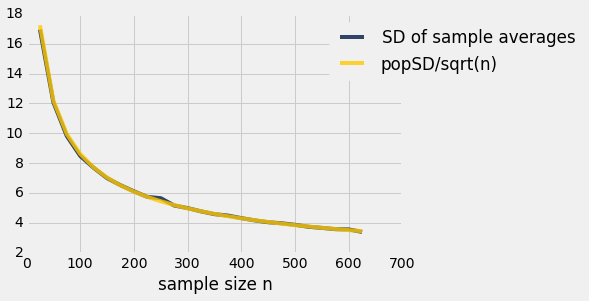

In [14]:
SEs.plot('sample size n', overlay=True)
plots.xlabel('sample size n')

Remember that the graph above is based on 4000 replications for each sample size. But there are many more than 4000 samples of sizes 25 or more. 

The probability distribution of the sample mean is based on the means of *all possible samples* of a fixed size.

The SD of all these possible sample averages has a special name.

$$
{\bf\mbox{Standard Error (SE) of the sample average}} ~=~
\frac{\mbox{Population SD}}{\sqrt{\mbox{sample size}}}
$$

This is the standard deviation of the list of averages of all possible samples that could be drawn. 

**The SE of the sample average measures roughly how far off the sample average is from the population average.**

We now have a very good idea about the SD in the Central Limit Theorem. It is not just decreasing: we know that it is decreasing according to a function that we have identified.

###The Central Limit Theorem (second attempt)
When the sample size is large, the probability distribution of the average of a random sample (drawn with replacement) is approximately bell shaped, with
- mean equal to the mean of the population, and 
- SD equal to the SE of the sample average: $\frac{\mbox{Population SD}}{\sqrt{\mbox{sample size}}}$ 

At this stage it is worth pausing to consider whether this remarkable regularity of the behavior of random sample means might somehow be related to the population from which we are drawing the samples, namely, the population of box office gross receipts.

Let us carry out the steps above using a different population. The new population consists of one value for each zipcode in California: the value is the number of household tax returns filed in that zipcode in 2013. The returns are measured in thousands. Here is a histogram of the population.

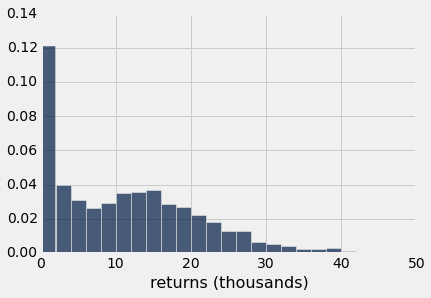

In [15]:
irs = Table.read_table('income_small.csv')
CA_hh = irs.select(['zipcode','N1']).group('zipcode',sum)
CA_hh = CA_hh.where(CA_hh['zipcode'] != 99999)
CA_hh['returns'] = CA_hh['N1 sum']/1000
CA_hh.select('returns').hist(bins=np.arange(0, 50, 2), normed=True)
plots.xlabel('returns (thousands)')

Notice that some zipcodes have very few households that filed tax returns, while other zipcodes had tens of thousands of such households. The distribution has a large spike at the low end.

If we run our simulations starting with this population, the results are comparable to those obtained when we started with the box office receipts.

In [16]:
"""Empirical distribution of random sample means"""

def samp_means(n):
    sample_size = n
    repetitions = 3000

    ave = []

    for i in range(repetitions):
        ave.append(np.mean(CA_hh.sample(sample_size, with_replacement=True)['returns']))

    Ave = Table([ave], ['averages'])
    Ave.hist(bins=np.arange(0, 25, 0.2), normed=True)
    plots.ylim(0, 1)
    plots.xlabel('averages: sample size '+str(n))
    print("Sample size: ", n)
    print("Population average:", np.mean(CA_hh['returns']))
    print("Population SD:", np.std(CA_hh['returns']))
    print("Average of sample averages: ", np.mean(ave))
    print("SD of sample averages", np.std(ave))

Sample size:  25
Population average: 11.1121390013
Population SD: 9.33264836939
Average of sample averages:  11.0951537333
SD of sample averages 1.86010624165


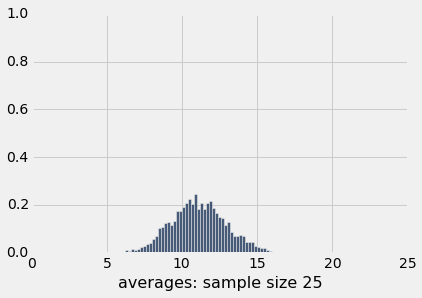

In [17]:
samp_means(25)

Sample size:  100
Population average: 11.1121390013
Population SD: 9.33264836939
Average of sample averages:  11.0960138667
SD of sample averages 0.949104459921


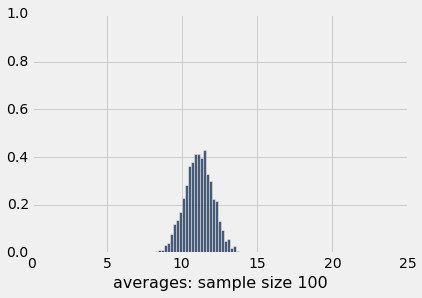

In [18]:
samp_means(100)

Sample size:  400
Population average: 11.1121390013
Population SD: 9.33264836939
Average of sample averages:  11.1290182167
SD of sample averages 0.466610344135


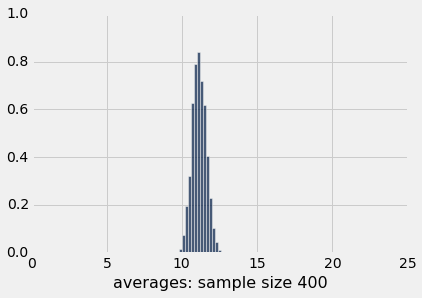

In [19]:
samp_means(400)

Once again, the empirical distributions of the sample means are roughly bell shaped; the approximation is better when the sample size is larger. The SDs of the empirical distributions follow the same square root law that we observed in the previous example.

This behavior occurs no matter what the distribution of the population looks like. Here is the final version of our theorem.

### The Central Limit Theorem
When the sample size is large, the probability distribution of the average of a random sample (drawn with replacement) is approximately bell shaped, with
- mean equal to the mean of the population, and 
- SD equal to the SE of the sample average

**no matter what the distribution of the population looks like.**